# ECG and EMG Signal Analysis
In this notebook, we will process ECG and EMG data from an h5 file, compute pulse change, analyze EMG frequency spectrum, and visualize the results.

## Step 1: Attaching Sensors and Data Acquisition
**Explanation:**  
Sensors were attached to the arms to collect ECG and EMG signals. The device used for measurement was connected to the computer via Bluetooth. This step is conducted in real life and does not involve any coding.

## Step 2: Recording ECG and EMG Measurements
**Explanation:**  
Using the BITalino application, ECG and EMG signals were recorded in the HDF5 (`.h5`) file format.

## Step 3: Reading and Processing Data
### Step 3.1: Read ECG and EMG Data from `.h5` File

In [25]:
import sys
!{sys.executable} -m pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /usr/local/bin/python3.12 -m pip install --upgrade pip


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.signal import find_peaks, welch
from numpy import array
from scipy.fftpack import fft
from scipy.signal import find_peaks

ecg_file_path = "opensignals_201612222257_2024-12-25_14-11-49.h5"
emg_file_path = "opensignals_201612222257_2024-12-25_14-33-19.h5"

fs = 1000

with h5py.File(ecg_file_path, 'r') as h5_file:
    h5_keys = h5_file.keys()  # 20:16:12:22:22:57
    h5_group = h5_file.get("20:16:12:22:22:57")
    sampling_rate = h5_group.attrs.get("sampling rate")
    print(list(h5_file.keys()))
    print("Second hierarchy level: " + str(list(h5_group)))
    print("Metadata of h5_group: \n" + str(list(h5_group.attrs.keys())))
    print("Sampling Rate: " + str(sampling_rate))
    h5_sub_group = h5_group.get("raw")
    h5_data = h5_sub_group.get("channel_1")
    data_list = [item for sublist in h5_data for item in sublist]
    h5_arr = array([item for sublist in h5_data for item in sublist])
    ecg_data = h5_arr[-100000:]

with h5py.File(ecg_file_path, 'r') as h5_file:
    h5_keys = h5_file.keys()  # 20:16:12:22:22:57
    h5_group = h5_file.get("20:16:12:22:22:57")
    h5_sub_group = h5_group.get("raw")
    h5_data = h5_sub_group.get("channel_1")
    data_list = [item for sublist in h5_data for item in sublist]
    h5_arr = array([item for sublist in h5_data for item in sublist])
    emg_data = h5_arr


['20:16:12:22:22:57']
Second hierarchy level: ['digital', 'events', 'plugin', 'raw', 'support']
Metadata of h5_group: 
['channels', 'comments', 'date', 'device', 'device connection', 'device name', 'digital IO', 'duration', 'firmware version', 'keywords', 'macaddress', 'mode', 'nsamples', 'resolution', 'sampling rate', 'sync interval', 'time']
Sampling Rate: 1000


### Step 3.2: Measure Pulse Change and Plot Rate of Change
#### Compute Pulse Change

In [27]:
# Find R-peaks in ECG signal
peaks, _ = find_peaks(ecg_data, height=0.5, distance=sampling_rate // 2)
rr_intervals = np.diff(peaks) / fs
heart_rate = 60 / np.mean(rr_intervals)
heart_rate_variability = np.std(rr_intervals)

print(f"Pulse Rate (BPM): {heart_rate:.2f}")
print(f"Pulse Rate Variability: {heart_rate_variability:.4f} s")

Pulse Rate (BPM): 75.25
Pulse Rate Variability: 0.0497 s


#### Plot Rate of Change of Pulse (Sliding Window)

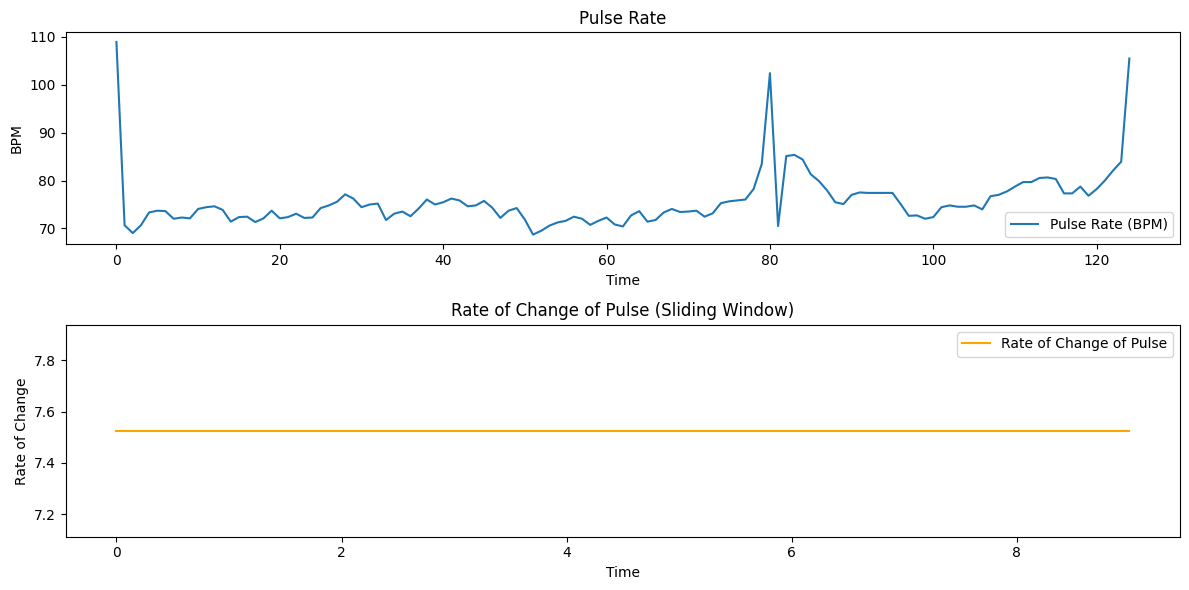

In [28]:
# Calculate rate of change of pulse using sliding window
window_size = 10  # Adjust the window size as needed
heart_rate_change = np.convolve(heart_rate, np.ones(window_size)/window_size, mode='valid')

# Plot pulse rate and its rate of change
plt.figure(figsize=(12, 6))

# Original Pulse Rate
plt.subplot(2, 1, 1)
plt.plot(pulse_rate, label='Pulse Rate (BPM)')
plt.title('Pulse Rate')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.legend()

# Rate of Change of Pulse
plt.subplot(2, 1, 2)
plt.plot(heart_rate_change, label='Rate of Change of Pulse', color='orange')
plt.title('Rate of Change of Pulse (Sliding Window)')
plt.xlabel('Time')
plt.ylabel('Rate of Change')
plt.legend()
plt.tight_layout()
plt.show()

### Step 3.3: Draw the EMG Frequency Spectrum
#### Compute Frequency Spectrum using Welch's Method

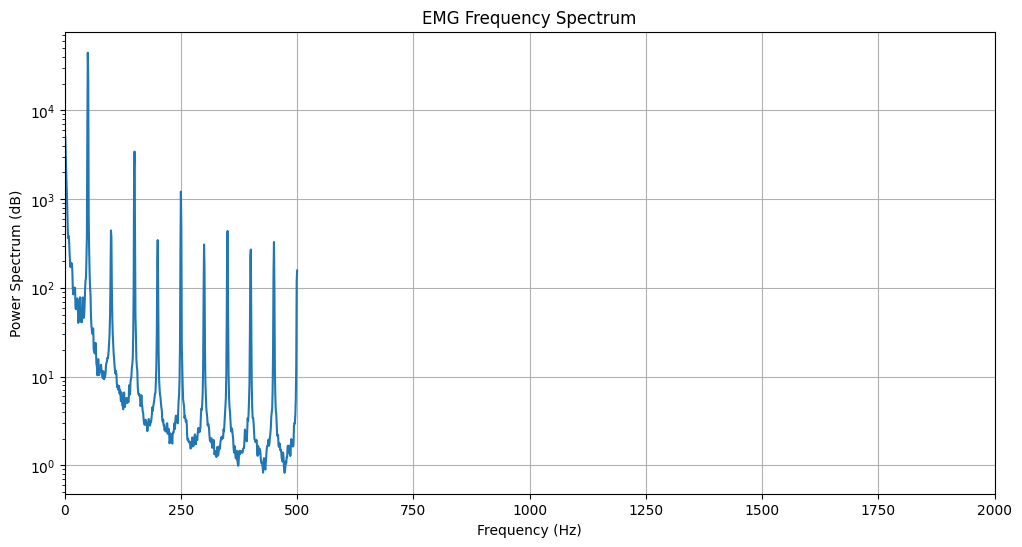

In [29]:
# Calculate frequency spectrum using Welch's method
frequencies, power_spectrum = welch(emg_data, fs=sampling_rate, nperseg=1024)
plt.figure(figsize=(12, 6))
plt.semilogy(frequencies, power_spectrum)
plt.title('EMG Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectrum (dB)')
plt.xlim([0, 2000])
plt.grid()
plt.show()

#### Frequency Density Distribution (FFD)

In [30]:
# Define frequency blocks
frequency_blocks = [(0, 1500), (5000, 20000)]  # Example blocks
frequency_density = {}

for block in frequency_blocks:
    block_mask = (frequencies >= block[0]) & (frequencies <= block[1])
    density = np.sum(power_spectrum[block_mask])
    frequency_density[block] = density

print("Frequency Density Distribution:")
for block, density in frequency_density.items():
    print(f"Frequency range {block}: Density = {density}")


Frequency Density Distribution:
Frequency range (0, 1500): Density = 110689.78393360812
Frequency range (5000, 20000): Density = 0.0


## Conclusion
**Summary of Results:**  
- Pulse changes and rates of change were computed and visualized.  
- EMG frequency spectrum was analyzed, and frequency density in defined blocks was calculated.